In [1]:
import astropy.units as u
from astropy.constants import G as _G
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gary.units import galactic
import gary.potential as gp

import biff
G = _G.decompose(galactic).value
from pygadgetreader import *
from octopus import profiles
from astropy import constants
from astropy import units as u

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# To-do
1. Check 1.4 factor in the potential!
2. Play with more coefficients in $n, l, m$
3. Use the MW+LMC halo

In [2]:
snap = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pos', 'dm')
mass = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'mass', 'dm')
trunc = np.where(np.sqrt(np.sum(snap**2.0, axis=-1))<500)

Returning DM    Positions
Returning DM    Mass


In [52]:
snap_t = snap[trunc]
mass_t = mass[trunc]
r = np.sqrt(np.sum(snap_t**2, axis=-1))

print sum(mass_t)

135.038098131


(-600.0, 600.0, -600.0, 600.0)

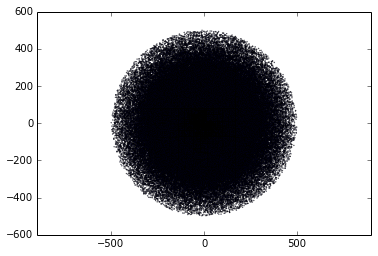

In [5]:
plt.scatter(snap_t[:,0], snap_t[:,1], s=0.1)
plt.axis('equal')

In [51]:
rho_teo = profiles.dens_hernquist(40.85, r, 1.55E12)
pot_teo = profiles.pot_hernquist(40.85, r, 1.55E12)
mass_teo = profiles.mass_hernquist(40.85, r, 1.35E12)

1.14853e+12


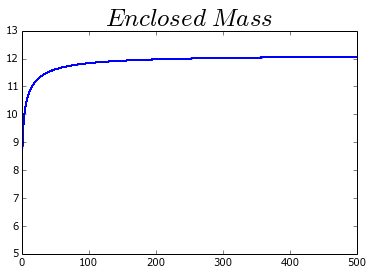

In [55]:
plt.title('$Enclosed\ Mass$', fontsize=25)
plt.plot(r, np.log10(mass_teo))
print mass_teo[-1]

In [77]:
nmax = 20
lmax = 0

Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

nlms = []

for n in range(nmax+1):
    for l in range(lmax+1):
        for m in range(l+1):
            nlms.append([n,l,m])

for nlm in nlms:
    n,l,m = nlm
    #print(n,l,m)
    S,T = biff.compute_coeffs_discrete(np.double(snap_t), np.double(mass_t/100.0), nlm, 40.85)
    Snlm[n,l,m] = S
    Tnlm[n,l,m] = T

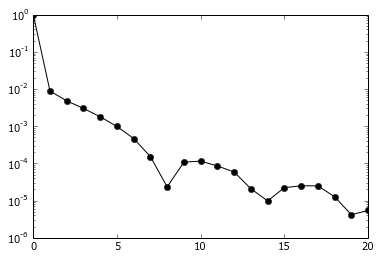

In [78]:
#plt.plot(np.abs(Snlm[:,0,0]/Snlm[0, 0,0]))
plt.semilogy(np.array(nlms)[:,0], np.abs(Snlm.flat/Snlm[0,0,0])[:], marker='o', c='k')
#plt.xlim(0,30)
#plt.ylim(1E-6, 1.0)

In [79]:
bfe_dens = biff.density(np.ascontiguousarray(np.double(snap_t)), Snlm, Tnlm, nmax, lmax, 1.55E12, 40.85)


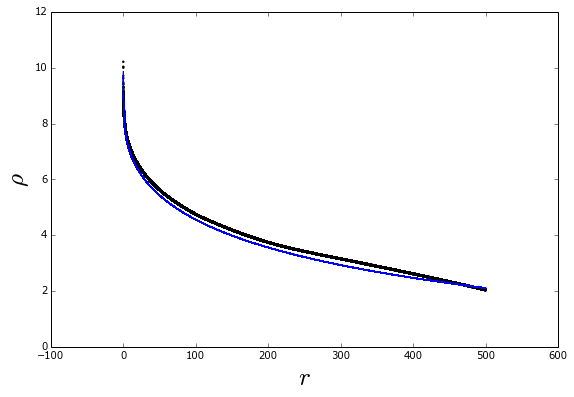

In [80]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(r, np.log10(rho_teo))
plt.scatter(r, np.log10(bfe_dens), c='k', alpha=1, s=2)
plt.xlabel('$r$', fontsize=25)
plt.ylabel(r'$\rho$', fontsize=25)


In [81]:
G_t = constants.G
G_t2 = G_t.to(u.kiloparsec**3 / (u.s**2 * u.Msun))
print G_t2

4.51835939627e-39 kpc3 / (s2 solMass)


In [82]:
bfe_pot = biff.potential(np.ascontiguousarray(np.double(snap_t)), Snlm, Tnlm, nmax, lmax, G_t2.value, 1.35E12, 40.85)

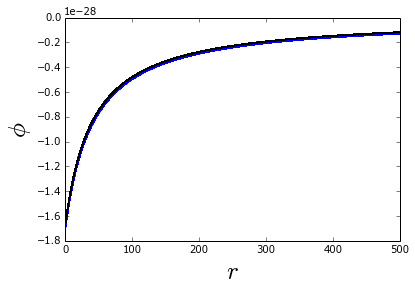

In [85]:
#plt.subplot(1, 2, 2)
#plt.plot(r, -np.log10(rho_teo))
plt.plot(r, (pot_teo))
plt.plot(r, bfe_pot/1.4, c='k', alpha=1) # check this 1.4?
plt.xlabel('$r$', fontsize=25)
plt.ylabel(r'$\phi$', fontsize=25)